## Business Case: Apollo Hospitals - Hypothesis Testing

Project Due in: 30 Sept

Mindset

Evaluation will be kept lenient, so make sure you attempt this case study.
It is understandable that you might struggle with getting started on this. Just brainstorm, discuss with peers, or get help from TAs.
There is no right or wrong answer. We have to become comfortable with dealing with uncertainty in business. This is exactly the skill we want to develop.
Context

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

How can you help here?

**The company wants to know:**

```• Which variables are significant in predicting the reason for hospitalization for different regions```

```• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges```

Dataset: Dataset_Link

Column Profiling

```
Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
Sex: This is the policy holder's gender, either male or female
Viral Load: Viral load refers to the amount of virus in an infected person's blood
Severity Level: This is an integer indicating how severe the patient is
Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.
Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
Hospitalization charges: Individual medical costs billed to health insurance```

**Concept Used:**

Graphical and Non-Graphical Analysis

2-sample t-test: testing for difference across populations

ANOVA

Chi-square

**How to begin**

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

Try establishing a relation between the dependent and independent variable (Dependent “hospitalization charges” & Independent: Smoker, Severity Level etc)

**Statistical Analysis:**

**-** Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

**-** Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

**-** Is the proportion of smoking significantly different across different regions? (Chi-square)

**-** Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

Set up Null Hypothesis (H0)

State the alternate hypothesis (H1)

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

Set a significance level (alpha)

Calculate test Statistics.

Decision to accept or reject null hypothesis.

Inference from the analysis

### Evaluation Criteria (80 Points)

**Define Problem Statement and perform Exploratory Data Analysis (10 points)**

Definition of problem (as per given problem statement with additional views)

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) ,missing value detection, statistical summary.

Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

Illustrate the insights based on EDA

Comments on range of attributes, outliers of various attributes

Comments on the distribution of the variables and relationship between them

Comments for each univariate and bivariate plots


**Missing values Treatment & Outlier treatment (10 Points)**

**Hypothesis Testing (40 Points):**

Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't? (10 Points)

Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (10 Points)

Is the proportion of smoking significantly different across different regions? (10 Points)

Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (10 Points)


**What good looks like (distribution of 10 points):**

Visual analysis (2)

Hypothesis formulation (1)

Select the appropriate test (1)

Check test assumptions (4)

Find the p-value(1)

Conclusion based on the p-value(1)

Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it.

Recommendations(10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

---

---

In [230]:
import pandas as pd
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
from statsmodels.stats.weightstats import ztest
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import warnings
import datetime as dt 
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from bioinfokit.analys import stat

In [280]:
apollo_df = pd.read_csv('apollo_hospitals_data.csv')
df = pd.read_csv('apollo_hospitals_data.csv')

---
## Explotarotory Data Analysis. 
---

In [281]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [282]:
df.isnull().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [283]:
df[df.duplicated()]

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges


In [284]:
df.shape

(1338, 8)

In [285]:
s = len(df[df['smoker']=='yes']['smoker'])
n_s = len(df[df['smoker']=='no']['smoker'])
# df['smoker'].replace({'yes':round(s/(s+n_s),3),'no':round(n_s/(s+n_s),3)},inplace=True)
df = pd.get_dummies(df, columns=['smoker'],drop_first=True)


In [286]:
df['smoker_yes'].value_counts()
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'region', 'viral load', 'severity level',
       'hospitalization charges', 'smoker_yes'],
      dtype='object')

In [334]:
conditions = [
(df['age'] <= 20) ,
(df['age'] <= 30) & (df['age'] > 20),
(df['age'] <= 40) & (df['age'] > 30),
(df['age'] <= 50) & (df['age'] > 40),
(df['age'] <= 60) & (df['age'] > 50),
(df['age'] > 60)]

values = ['0 - 20','21 - 30','31 - 40','41 - 50','51 - 60','60+']
df['age_range'] = np.select(conditions,values)
# df.sort_values(by='hospitalization charges',ascending=True,inplace=True)

#_______________________________________________________________________________________________________


conditions = [
(df['hospitalization charges'] <= 15000) & (df['hospitalization charges'] > 0),
(df['hospitalization charges'] <= 30000) & (df['hospitalization charges'] > 15001),
(df['hospitalization charges'] <= 45000) & (df['hospitalization charges'] > 30001),
(df['hospitalization charges'] <= 60000) & (df['hospitalization charges'] > 45001),
(df['hospitalization charges'] <= 75000) & (df['hospitalization charges'] > 60001),
(df['hospitalization charges'] <= 100000) & (df['hospitalization charges'] > 75001),
(df['hospitalization charges'] <= 115000) & (df['hospitalization charges'] > 100001),
(df['hospitalization charges'] <= 130000) & (df['hospitalization charges'] > 115001),
(df['hospitalization charges'] > 130001)]

values = ['0 - 15000','15001 - 30000','30001 - 45000','45001 - 60000','60001 - 75000','75001 - 100000','100001 - 115000','115001 - 130000','130000+']
df['charges_Range'] = np.select(conditions,values)
# df.sort_values(by='hospitalization charges',ascending=True,inplace=True)

In [288]:
for i in ['sex', 'region',  'severity level', 'smoker_yes', 'charges_Range', 'age_range']:
        print(df[i].value_counts(normalize=True)*100)
        print('_'*50)

male      50.523169
female    49.476831
Name: sex, dtype: float64
__________________________________________________
southeast    27.204783
northwest    24.289985
southwest    24.289985
northeast    24.215247
Name: region, dtype: float64
__________________________________________________
0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: severity level, dtype: float64
__________________________________________________
20836     0.149477
35986     0.149477
11799     0.149477
16501     0.149477
5509      0.149477
            ...   
4372      0.074738
115378    0.074738
25265     0.074738
29360     0.074738
6143      0.074738
Name: hospitalization charges, Length: 1320, dtype: float64
__________________________________________________
0    79.521674
1    20.478326
Name: smoker_yes, dtype: float64
__________________________________________________
0 - 15000          32.062780
15001 - 30000      31.165919
30001 - 45000      13.378176
45001 - 6000

---
### Observations 1


- Approximately only 5.3 % people are accountable for above 100000 hospitalisation charges.


- Approximately only 20 % of peoples are smoker.


- Approximately only 3 % peoples fall in the catagory of severity level 4 and 5.



- 42 % peoples fall in the catagory of severity level 0, whith is the highest.


- Roughly 76 % of people spents below 45000 hospitalisation charges.



- Roughly 75 % of people falls below severity level 2.


---

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
 7   smoker_yes               1338 non-null   uint8  
 8   age_range                1338 non-null   object 
 9   charges_Range            1338 non-null   object 
dtypes: float64(1), int64(4), object(4), uint8(1)
memory usage: 95.5+ KB


In [290]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296,0.204783
std,386.391641,14.049960,2.032796,1.205493,30275.029296,0.403694
min,0.000000,18.000000,5.320000,0.000000,2805.000000,0.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000,0.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000,0.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000,0.000000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000,1.000000


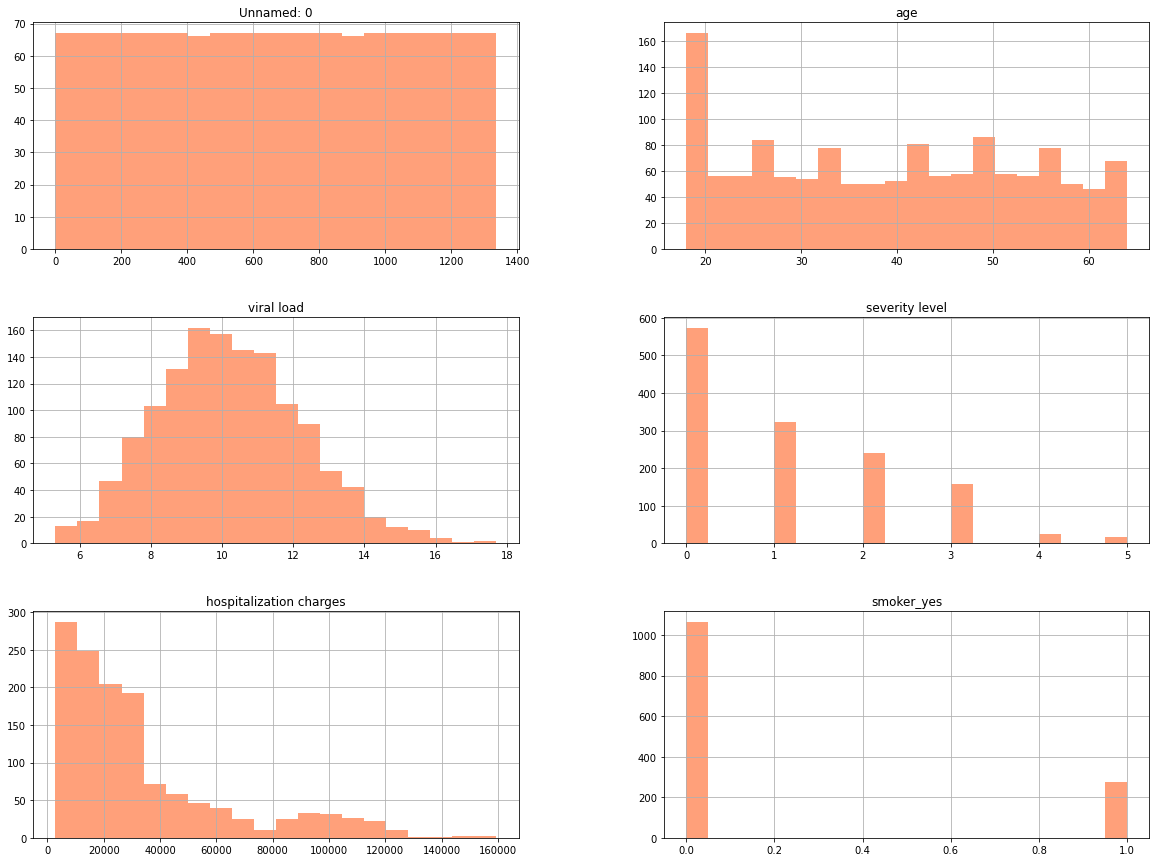

In [291]:
df.hist(bins=20,figsize=(20,15),color='lightsalmon')
plt.show()

In [292]:
heatmap_df = df[['Unnamed: 0', 'age', 'sex', 'smoker_yes', 'viral load',
       'severity level', 'hospitalization charges']]

In [293]:
heatmap_df = pd.get_dummies(heatmap_df,columns=['sex'],drop_first=True)


In [328]:
heatmap_df.head()

,Unnamed: 0,age,smoker_yes,viral load,severity level,hospitalization charges,sex_male
0,0,19,1,9.30,0,42212,0
1,1,18,0,11.26,1,4314,1
2,2,28,0,11.00,3,11124,1
3,3,33,0,7.57,0,54961,1
4,4,32,0,9.63,0,9667,1


---
## Explotarotory Data Analysis Ends.
---

---
##  Correlation of all variables with dependent variable i.e. hospitalization charges.
---

          Correlation of Unnamed: 0 with hospitalisation charges
       ___________________________________________________________


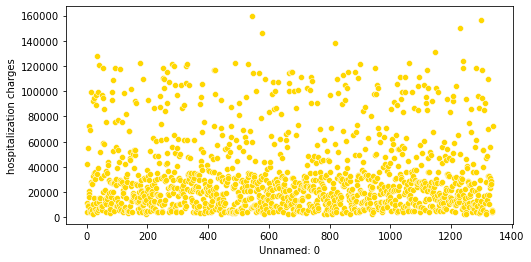

          Correlation of age with hospitalisation charges
       ___________________________________________________________


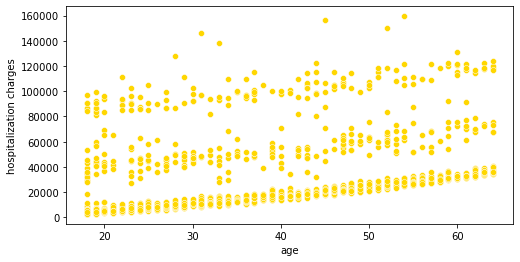

          Correlation of smoker_yes with hospitalisation charges
       ___________________________________________________________


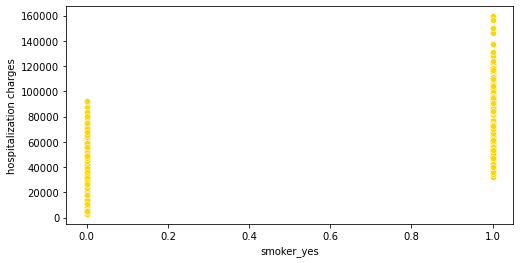

          Correlation of viral load with hospitalisation charges
       ___________________________________________________________


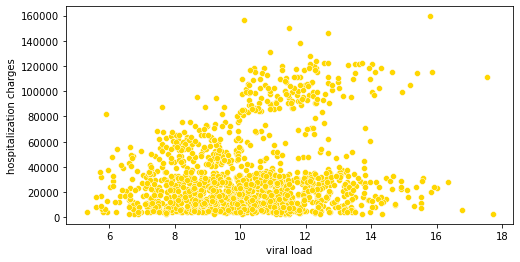

          Correlation of severity level with hospitalisation charges
       ___________________________________________________________


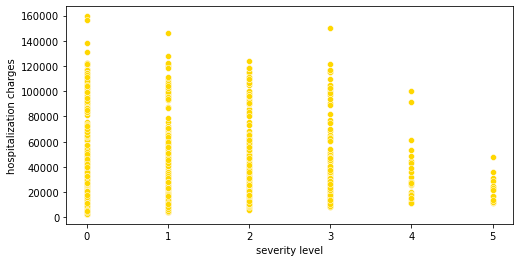

          Correlation of hospitalization charges with hospitalisation charges
       ___________________________________________________________


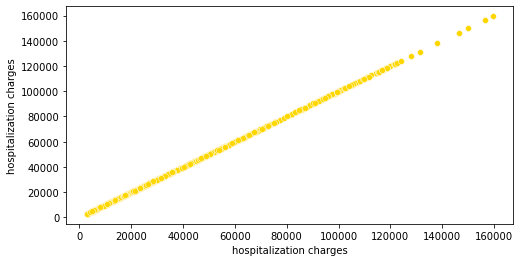

          Correlation of sex_male with hospitalisation charges
       ___________________________________________________________


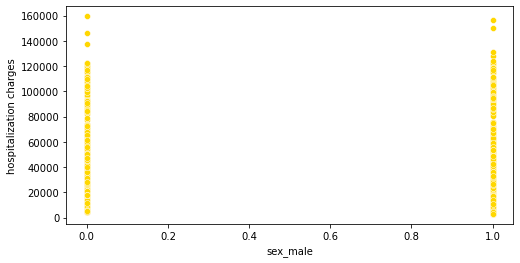

In [295]:
for i in heatmap_df.columns:
    print(f'          Correlation of {i} with hospitalisation charges')
    print('       ___________________________________________________________')
    plt.figure(figsize=(8,4))
    sns.scatterplot(heatmap_df[i],heatmap_df['hospitalization charges'],color = 'gold')
    
    plt.show()



---


### Observations 2

- People with viral load 10 to 14 tends to spend high hospitalisation charges.


- Non-smokers spents hospitalisation charges below 100000, where as smokers tends to spent hospitalisation charges upto 160000.


- A slight correlation can be seen between increasing age and hospitalisation charge.


- As severity level decreases hospitalisation charges tends to decrease.

---

---
###  Correlation of all variables with dependent variable i.e. hospitalization charges ends.
---

## EDA Ends.
---

---
## **Hypothesis Testing**.
---

### Right Tailed T Test.

In [297]:
smoker = [df[df.smoker_yes == 1]['hospitalization charges'].sample(250,replace=True).mean()for i in range(10000)]
n_smoker = [df[df.smoker_yes == 0]['hospitalization charges'].sample(250,replace=True).mean()for i in range(10000)]


n_smoker1 = df[df.smoker_yes == 0]['hospitalization charges']
smoker1 = df[df.smoker_yes == 1]['hospitalization charges']

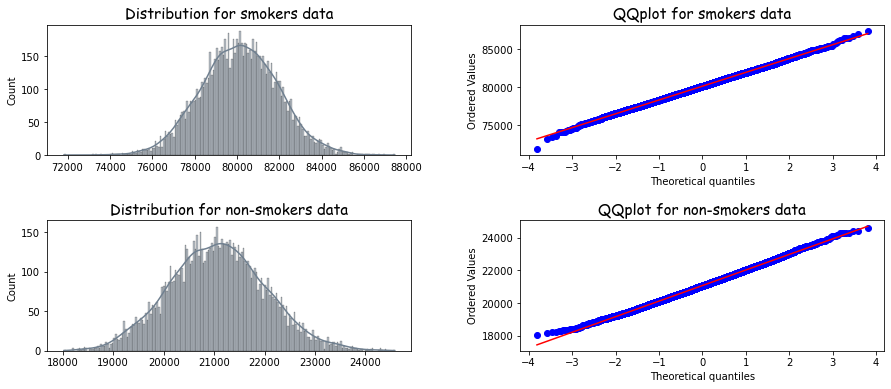

In [298]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(221)
sns.histplot(smoker, bins=200, kde=True,color='slategrey')
plt.title('Distribution for smokers data',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(222)
stats.probplot(smoker, dist='norm', plot=plt)
plt.title('QQplot for smokers data',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(223)
sns.histplot(n_smoker, bins=200, kde=True,color='slategrey')
plt.title('Distribution for non-smokers data',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(224)
stats.probplot(n_smoker, dist='norm', plot=plt)
plt.title('QQplot for non-smokers data',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [299]:
c,p = [],[]
for i in range(1000):
    c.append(stats.ttest_ind(smoker1.sample(250,replace=True),n_smoker1.sample(250,replace=True),alternative='greater')[0])
    p.append(stats.ttest_ind(smoker1.sample(250,replace=True),n_smoker1.sample(250,replace=True),alternative='greater')[1])
crt_val = np.mean(c)
p_val = np.mean(p)
p_val
print(f'p value is {p_val} and critical value is {crt_val}')

p value is 8.922313008584507e-91 and critical value is 28.778982017744703


---

Null Hypothesis ~ **smokers mean = non-smokers mean**


Alt Hypothesis ~ **smokers mean > non-smokers mean**


As p value < alpha **Null Hypothesis Rejected !**


---



---
### Observation 3

- With the above right tailed t-test it is proved that smokers have to spent higher hospitalisation charges than non-smokers.


---

### Two Tailed T Test.

In [300]:
# df[df.sex == 'female']['viral load']

In [301]:
viralload_fm = [df[df.sex == 'female']['viral load'].sample(600,replace=True).mean()for i in range(10000)]
viralload_m = [df[df.sex == 'male']['viral load'].sample(600,replace=True).mean()for i in range(10000)]

viralload_fm1 = df[df.sex == 'female']['viral load']
viralload_m1 = df[df.sex == 'male']['viral load']

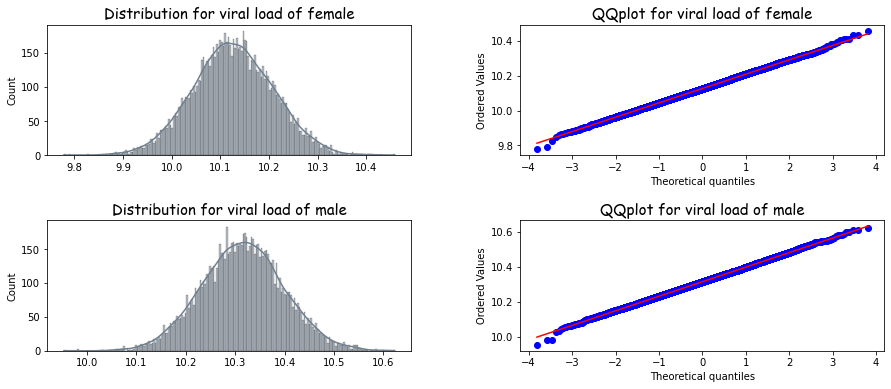

In [302]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(221)
sns.histplot(viralload_fm, bins=200, kde=True,color='slategrey')
plt.title('Distribution for viral load of female',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(222)
stats.probplot(viralload_fm, dist='norm', plot=plt)
plt.title('QQplot for viral load of female',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(223)
sns.histplot(viralload_m, bins=200, kde=True,color='slategrey')
plt.title('Distribution for viral load of male',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(224)
stats.probplot(viralload_m, dist='norm', plot=plt)
plt.title('QQplot for viral load of male',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [303]:
c,p = [],[]
for i in range(1000):
    c.append(stats.ttest_ind(viralload_fm1.sample(600,replace=True),viralload_m1.sample(600,replace=True))[0])
    p.append(stats.ttest_ind(viralload_fm1.sample(600,replace=True),viralload_m1.sample(600,replace=True))[1])
crt_val = np.mean(c)
p_val = np.mean(p)
p_val
print(f'p value is {p_val} and critical value is {crt_val}')

p value is 0.2210017739437389 and critical value is -1.5542897071758102


---

Null Hypothesis ~ **Viral load of female  =  Viral load of male**


Alt Hypothesis ~ **Viral load of female  !=  Viral load of male**


As p value > alpha **Null Hypothesis accepted !**

---

---
### Observation 4

- With the above two tailed t-test it is proved that mean viral load of female is actually equals to mean viral load of male.


---

### Anova Test.

In [304]:
Anova = df[['viral load','severity level','sex']]

Anova = Anova[Anova['sex'] == 'female']

In [305]:
A0 = Anova[Anova['severity level'] == 0]['viral load']
A1 = Anova[Anova['severity level'] == 1]['viral load']
A2 = Anova[Anova['severity level'] == 2]['viral load']
# A3 = Anova[Anova['severity level'] == 3]['viral load']
# A4 = Anova[Anova['severity level'] == 4]['viral load']
# A5 = Anova[Anova['severity level'] == 5]['viral load']

A_All = [A0,A1,A2]

         Viral load for severity level 0
         _______________________________


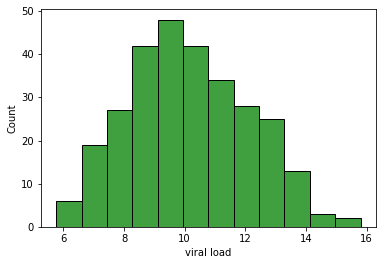

         Viral load for severity level 1
         _______________________________


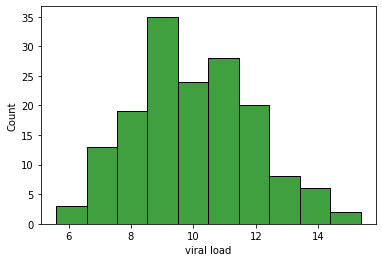

         Viral load for severity level 2
         _______________________________


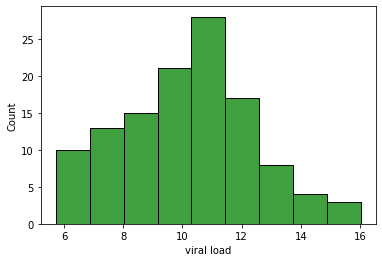

In [306]:
for x,i in enumerate(A_All):
    print('         Viral load for severity level',x)
    print('         _______________________________')
    sns.histplot(i,color='g')
    
    plt.show()

**All the variance varies from 8 to 10, assumption for anova i.e. all variance must be similar is checked !**

In [307]:
stats.f_oneway(A0,A1,A2)

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

---

Null Hypothesis ~ **the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level are same.**


Alt Hypothesis ~ **the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level are not same.**


As p value > alpha, **Null Hypothesis accepted !**

---


---
### Observation 5

- With the above one way anova test it is proved that the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level are same.

---

## Is the proportion of smoking significantly different across different regions?

In [308]:
chi_tab = pd.crosstab(df.smoker_yes,df.region)

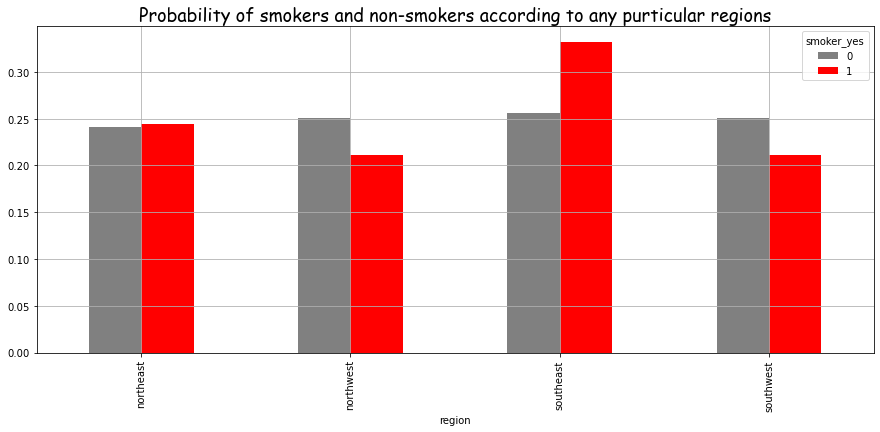

In [309]:
cond_prob(df.region,df.smoker_yes)
plt.title('Probability of smokers and non-smokers according to any purticular regions',fontsize=18,fontname="Comic Sans MS")
plt.show()

In [310]:
stat, p_value, dof, expected = stats.chi2_contingency(chi_tab)
stat, p_value, dof
print(f''' 

observed values : 
___________________

{chi_tab.values}
___________________

expected values : 
___________________

{expected}
___________________

T Statistics : {stat},


P Value : {p_value}, 


Degree of freedom : {dof}''')

 

observed values : 
___________________

[[257 267 273 267]
 [ 67  58  91  58]]
___________________

expected values : 
___________________

[[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]
___________________

T Statistics : 7.34347776140707,


P Value : 0.06171954839170547, 


Degree of freedom : 3


------------------------------------------------------------------------------------------------------------------
Null Hypothesis ~ **the proportion of smoking are equal across different regions.**


Alt Hypothesis ~ **the proportion of smoking significantly different across different regions.**


As p value > alpha, **Null Hypothesis Accepted !**


---
### Observation 6

- With the above  chi square test it is proved that the proportion of smoking are equal across different regions.

---

---
## Hypothesis Testing Ends.
---

# Rough

In [311]:
df1 = df.copy()
# df1.replace({'southwest':1,'southeast':2,'northwest':3,'northeast':4},inplace=True)


,Unnamed: 0,age,sex,region,viral load,severity level,hospitalization charges,smoker_yes,age_range,charges_Range
0,0,19,female,southwest,9.30,0,42212,1,0 - 20,30001 - 45000
1,1,18,male,southeast,11.26,1,4314,0,0 - 20,0 - 15000
2,2,28,male,southeast,11.00,3,11124,0,21 - 30,0 - 15000
3,3,33,male,northwest,7.57,0,54961,0,31 - 40,45001 - 60000
4,4,32,male,northwest,9.63,0,9667,0,31 - 40,0 - 15000
...,...,...,...,...,...,...,...,...,...,...
1333,1333,50,male,northwest,10.32,3,26501,0,41 - 50,15001 - 30000
1334,1334,18,female,northeast,10.64,0,5515,0,0 - 20,0 - 15000
1335,1335,18,female,southeast,12.28,0,4075,0,0 - 20,0 - 15000
1336,1336,21,female,southwest,8.60,0,5020,0,21 - 30,0 - 15000


In [312]:
df1['hospitalization charges'].max()

159426

# Rough Ends

---

---
## Conditional Probability.
---

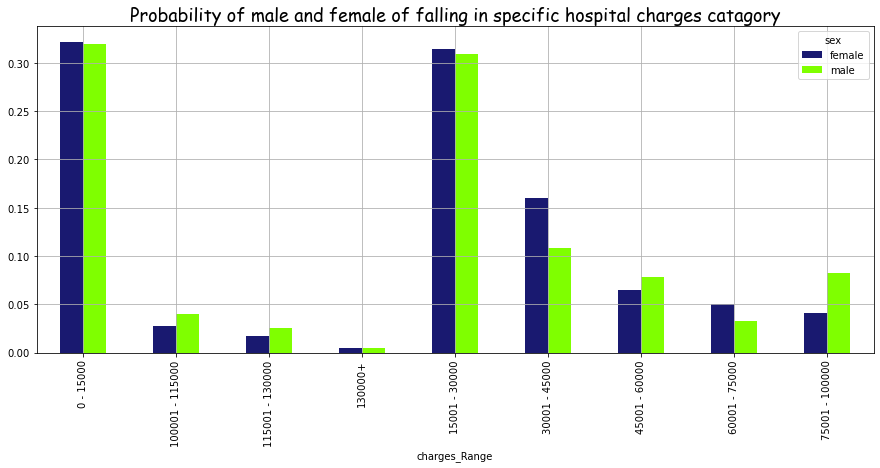

In [313]:
def cond_prob(i,j):
    Joint_vals_fitness = pd.crosstab(i,j,normalize=True)
    product = Joint_vals_fitness.sum(axis=0)
    cond_Prob = Joint_vals_fitness.divide(product,axis=1)
    return cond_Prob.plot.bar(figsize=(15,6),grid=True,color=('midnightblue','chartreuse'))
cond_prob( df.charges_Range,df.sex)
plt.title('Probability of male and female of falling in specific hospital charges catagory',fontsize=18,fontname="Comic Sans MS")
plt.show()


---
### Observation 7

- There are 60 % probability that a male and a female can fall in the spending range of 0-30000 hospitalisation charges.


- There are roughly 6 % probability that a male and a female can spend above 100000 hospitalisation charges.

---

In [314]:
def cond_prob(i,j):
    Joint_vals_fitness = pd.crosstab(i,j,normalize=True)
    product = Joint_vals_fitness.sum(axis=0)
    cond_Prob = Joint_vals_fitness.divide(product,axis=1)
    return cond_Prob.plot.bar(figsize=(15,6),grid=True,color=('grey','r','m','y','sienna','c','gold','midnightblue','chartreuse'))

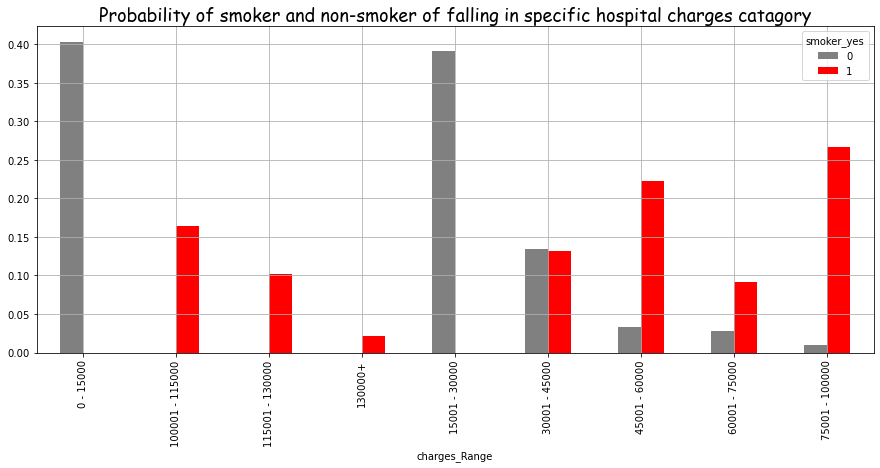

In [315]:
cond_prob(df['charges_Range'],df.smoker_yes)
plt.title('Probability of smoker and non-smoker of falling in specific hospital charges catagory',fontsize=18,fontname="Comic Sans MS")
plt.show()


---
### Observation 8

- There are roughly 95 % probability of a non-smoker to spend hospitalisation charge less than 45000.


- There are roughly 27 % probability of a smoker to spend hospitalisation charge more than 100000.


- There are 62 % probability of a smoker to spend hospitalisation charges between 30000 - 100000.

---

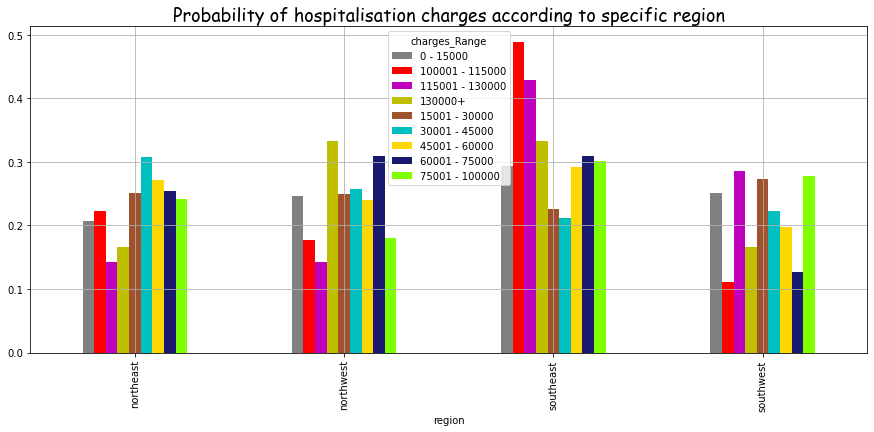

In [316]:
cond_prob(df.region,df.charges_Range)
plt.title('Probability of hospitalisation charges according to specific region',fontsize=18,fontname="Comic Sans MS")
plt.show()


---
### Ovservation 9

- There are 50 % probability of a person spending in the range of 100000 - 115000 belongs to sutheast region which is the highest.  

---




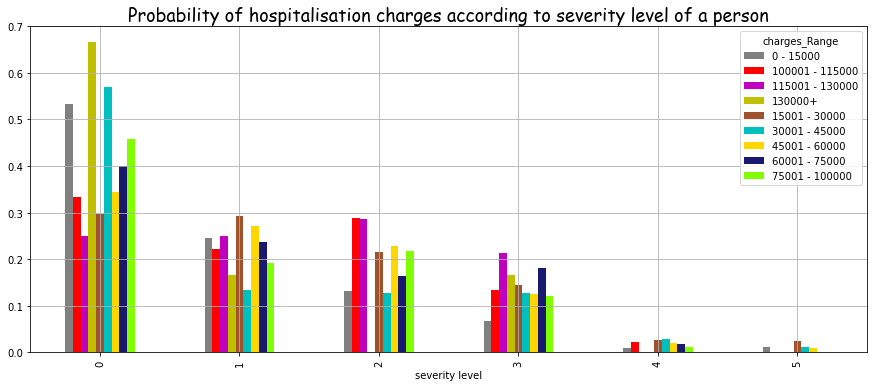

In [317]:
cond_prob(df['severity level'],df.charges_Range)
plt.title('Probability of hospitalisation charges according to severity level of a person',fontsize=18,fontname="Comic Sans MS")
plt.show()


---

### Observation 10

- There are 65 % probability of a person spending above 130000+ on hospitalisation charges falls into severity level 0 which is the highest.



-  Probability of a person falling in severity level 0 is the highest.

---

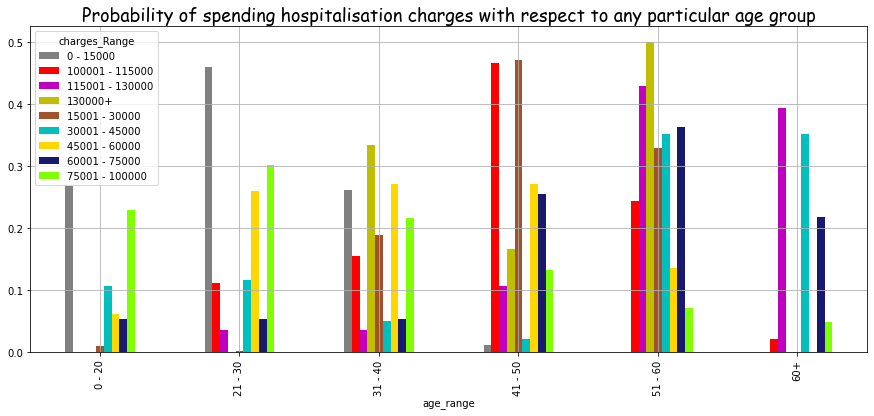

In [337]:
cond_prob(df['age_range'],df.charges_Range)
plt.title('Probability of spending hospitalisation charges with respect to any particular age group',fontsize=18,fontname="Comic Sans MS")

plt.show()

---
### Observations 11

- There is nearly 50 % probability of a person spending 130000+ falls in the age range of 51 - 60.


- There is nearly 47 % probability of a person spending below 15000 falls in the age range of 21 - 30.


- There is nearly 48 % probability of a person spending 100000 - 115000 falls in the age range of 41 - 50.


- There is narly 48 % probability of a person spending 15000 - 30000 falls in the age range of 41 - 50.



- There is narly 80 % probability of a person spending 100000 - 115000 falls in the age range of 50+ .



- There is narly 81 % probability of a person spending 60000 - 75000 falls in the age range of 40+ .



- There is narly 70 % probability of a person spending 30000 - 45000 falls in the age range of 40 - 60 .


--- 











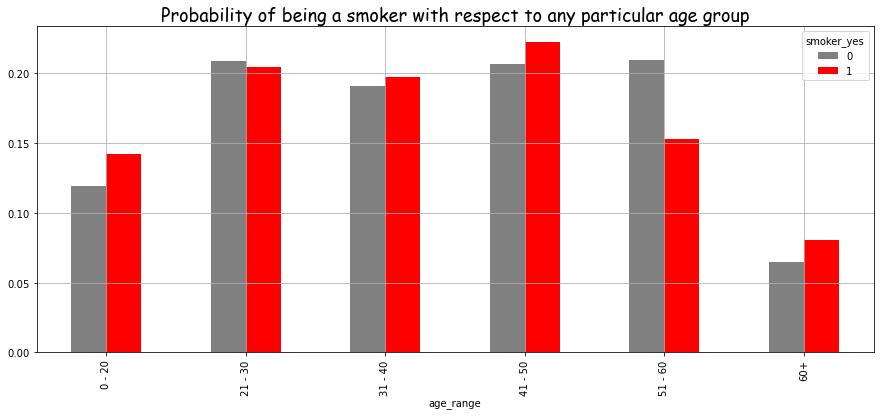

In [319]:
cond_prob(df['age_range'],df.smoker_yes)
plt.title('Probability of being a smoker with respect to any particular age group',fontsize=18,fontname="Comic Sans MS")

plt.show()




---
### Observations 12

- An increasing trend of a smoker can be seen upto age 50.



- A decreasing trend of a smoker can be seen after age 50.


- There are roughly 22 % probability of a smoker falling in the age range between 41 - 50 which is the highest.


- There are roughly 7 % probability of a smoker falling in the age range above 60 which is the least.

---

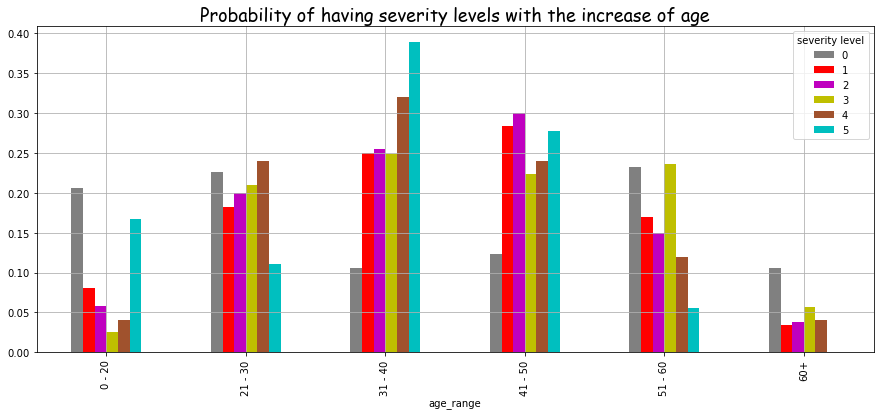

In [320]:
cond_prob(df['age_range'],df['severity level'])
plt.title('Probability of having severity levels with the increase of age',fontsize=18,fontname="Comic Sans MS")

plt.show()


---
### Obervations 13


-  There are roughly 66 % probability of a 5th level severity person falling in the age range of 31 - 50, where 31-40 has the highest probability of roughly 38 %.



-  There are roughly 79 % probability of a 4th level severity person falling in the age range of 21 - 50, where 31-40 has the highest with roughly 33 % probability.




---
## Conditional Probability Ends.
---

---

# Insights




---
### Observations 1


- Approximately only 5.3 % people are accountable for above 100000 hospitalisation charges.


- Approximately only 20 % of peoples are smoker.


- Approximately only 3 % peoples fall in the catagory of severity level 4 and 5.



- 42 % peoples fall in the catagory of severity level 0, whith is the highest.


- Roughly 76 % of people spents below 45000 hospitalisation charges.



- Roughly 75 % of people falls below severity level 2.


---
---

### Observations 2

- People with viral load 10 to 14 tends to spend high hospitalisation charges.


- Non-smokers spents hospitalisation charges below 100000, where as smokers tends to spent hospitalisation charges upto 160000.


- A slight correlation can be seen between increasing age and hospitalisation charge.


- As severity level decreases hospitalisation charges tends to decrease.

---
---
### Observation 3

- With the above right tailed t-test it is proved that smokers have to spent higher hospitalisation charges than non-smokers.


---


---
### Observation 4

- With the above two tailed t-test it is proved that mean viral load of female is actually equals to mean viral load of male.


---

---
### Observation 5

- With the above one way anova test it is proved that the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level are same.


---

---
### Observation 6

- With the above  chi square test it is proved that the proportion of smoking are equal across different regions.


---

---
### Observation 7

- There are 60 % probability that a male and a female can fall in the spending range of 0-30000 hospitalisation charges.


- There are roughly 6 % probability that a male and a female can spend above 100000 hospitalisation charges.

---
---
### Observation 8

- There are roughly 95 % probability of a non-smoker to spend hospitalisation charge less than 45000.


- There are roughly 27 % probability of a smoker to spend hospitalisation charge more than 100000.


- There are 62 % probability of a smoker to spend hospitalisation charges between 30000 - 100000.

---

---
### Ovservation 9

- There are 50 % probability of a person spending in the range of 100000 - 115000 belongs to sutheast region which is the highest.  


---




---

### Observation 10

- There are 65 % probability of a person spending above 130000+ on hospitalisation charges falls into severity level 0 which is the highest.



-  Probability of a person falling in severity level 0 is the highest.


---



---
### Observations 11

- There is nearly 50 % probability of a person spending 130000+ falls in the age range of 51 - 60.


- There is nearly 47 % probability of a person spending below 15000 falls in the age range of 21 - 30.


- There is nearly 48 % probability of a person spending 100000 - 115000 falls in the age range of 41 - 50.


- There is narly 48 % probability of a person spending 15000 - 30000 falls in the age range of 41 - 50.



- There is narly 80 % probability of a person spending 100000 - 115000 falls in the age range of 50+ .



- There is narly 81 % probability of a person spending 60000 - 75000 falls in the age range of 40+ .



- There is narly 70 % probability of a person spending 30000 - 45000 falls in the age range of 40 - 60 .


--- 


---
### Observations 12

- An increasing trend of a smoker can be seen upto age 50.



- A decreasing trend of a smoker can be seen after age 50.


- There are roughly 22 % probability of a smoker falling in the age range between 41 - 50 which is the highest.


- There are roughly 7 % probability of a smoker falling in the age range above 60 which is the least.

---

---
### Obervations 13


-  There are roughly 66 % probability of a 5th level severity person falling in the age range of 31 - 50, where 31-40 has the highest probability of roughly 38 %.



-  There are roughly 79 % probability of a 4th level severity person falling in the age range of 21 - 50, where 31-40 has the highest with roughly 33 % probability.




---

# Recommendations

---
### ***Attributes of a high hospitalisation charges spending person.***

---
---

- **A smoker has the highest chances of spending significantly high on hospitalisation charges than a non-smoker.**


- **A person with 0 severity level has the highest chances of spending significantly high on hospitalisation charges than a other severity level patients.**


- **A person with viral load 10 - 14 has the highest chances of spending significantly high on hospitalisation charges.**


---
